# Визуализация табличных данных

## Построение графиков в Python при помощи библиотеки  `Matplotlib` и `Seaborn`

Многие данные, используемые в работе полезных приложений, представляются в виде таблиц. Таблицы сами по себе менее наглядны для человека, чем изображения, и это затрудняет их понимание и анализ. Визуализация табличных данных помогает более наглядно представить ту же информацию. При визуализации табличных данных большую роль играют различные группировки данных, взаимосвязи между ними, для этого предназначены разные типы графиков. 

Число инструментов для визуализации табличных данных велико, мы познакомимся с двумя: библиотеки [`seaborn`](https://seaborn.pydata.org/) и [`plotly`](https://plotly.com/python/). 

Для работы с таблицами будем использовать уже известную нам библиотеку [`pandas`](https://pandas.pydata.org/). Давайте подключим ее и загрузим какую-нибудь табличку. 

## `Matplotlib`

## Диаграмма рассеяния (scatter plot)

Диаграмма рассеяния (также точечная диаграмма, англ. scatter plot) — математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости. Могут использоваться и полярные координаты, особенно в случаях, когда одна из переменных представляет собой физическое направление или имеет циклический характер.
На диаграмме рассеяния каждому наблюдению (или элементарной единице набора данных) соответствует точка, координаты которой равны значениям двух каких-то параметров этого наблюдения. Если предполагается, что один из параметров зависит от другого, то обычно значения независимого параметра откладывается по горизонтальной оси, а значения зависимого — по вертикальной. Диаграммы рассеяния используются для демонстрации наличия или отсутствия корреляции между двумя переменными.

Диаграмма рассеяния отображает пространство одних вещественных чисел в пространстве других вещественных чисел. Иными словами, каждая точка одного атрибута соответствует каждой точке другого. В matplotlib он имеет название scatter:


In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('../dataset/car.csv', delimiter=',').dropna().drop(['Market Category'], axis=1)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


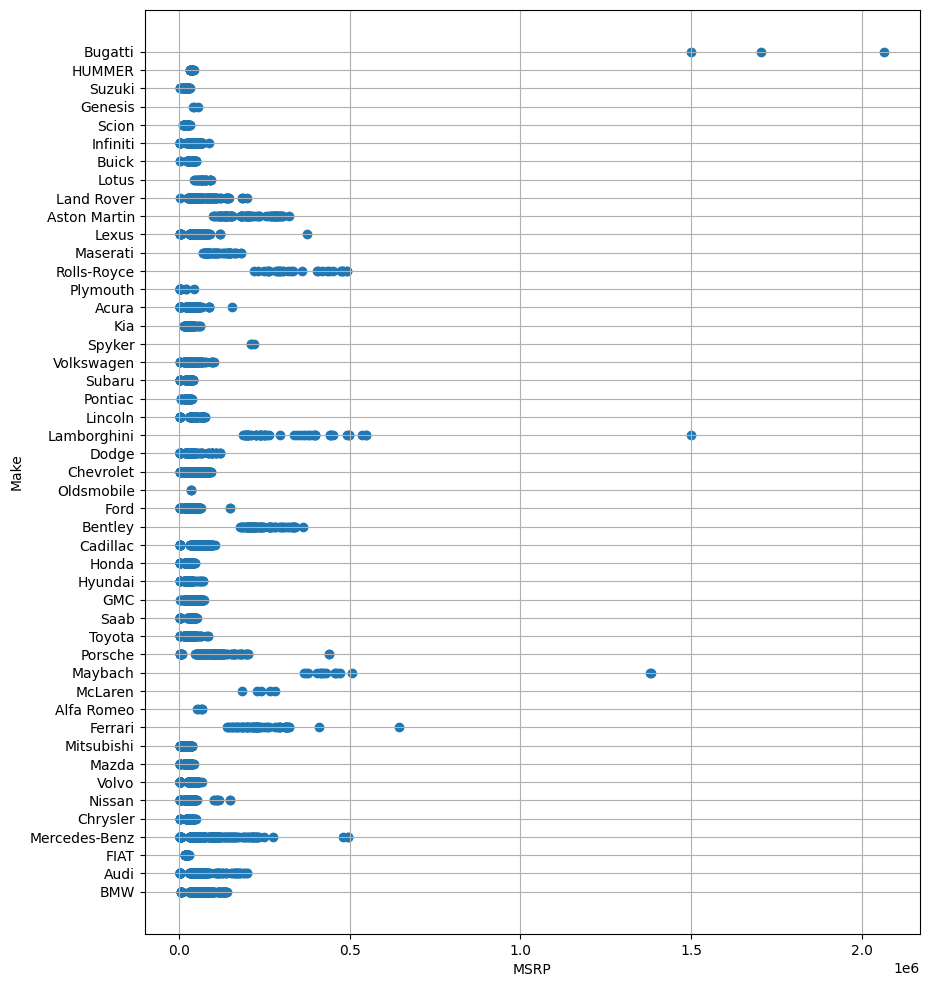

In [2]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('MSRP')
plt.ylabel('Make')
plt.grid(True)
plt.scatter(x=df['MSRP'], y=df['Make'])

## Линейный график (plot)

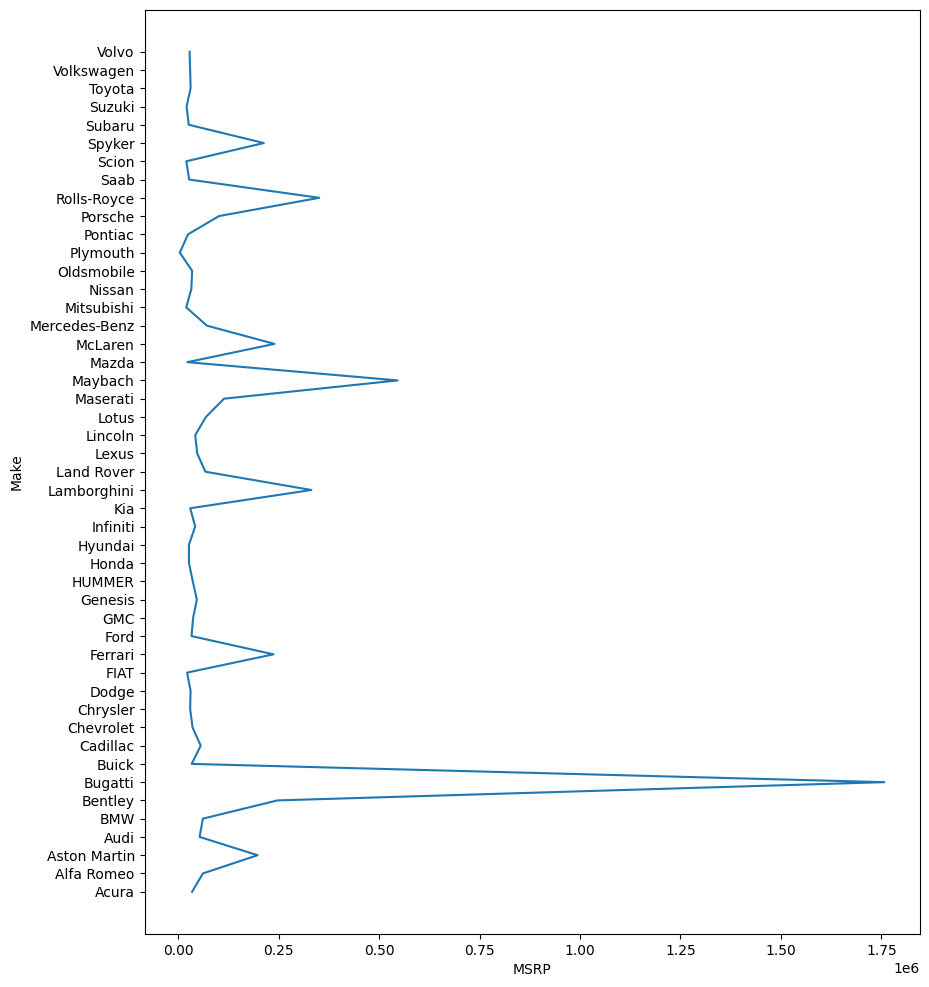

In [3]:
d = df.groupby('Make').mean(numeric_only=True)
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('MSRP')
plt.ylabel('Make')
plt.plot(d.MSRP, d.index)

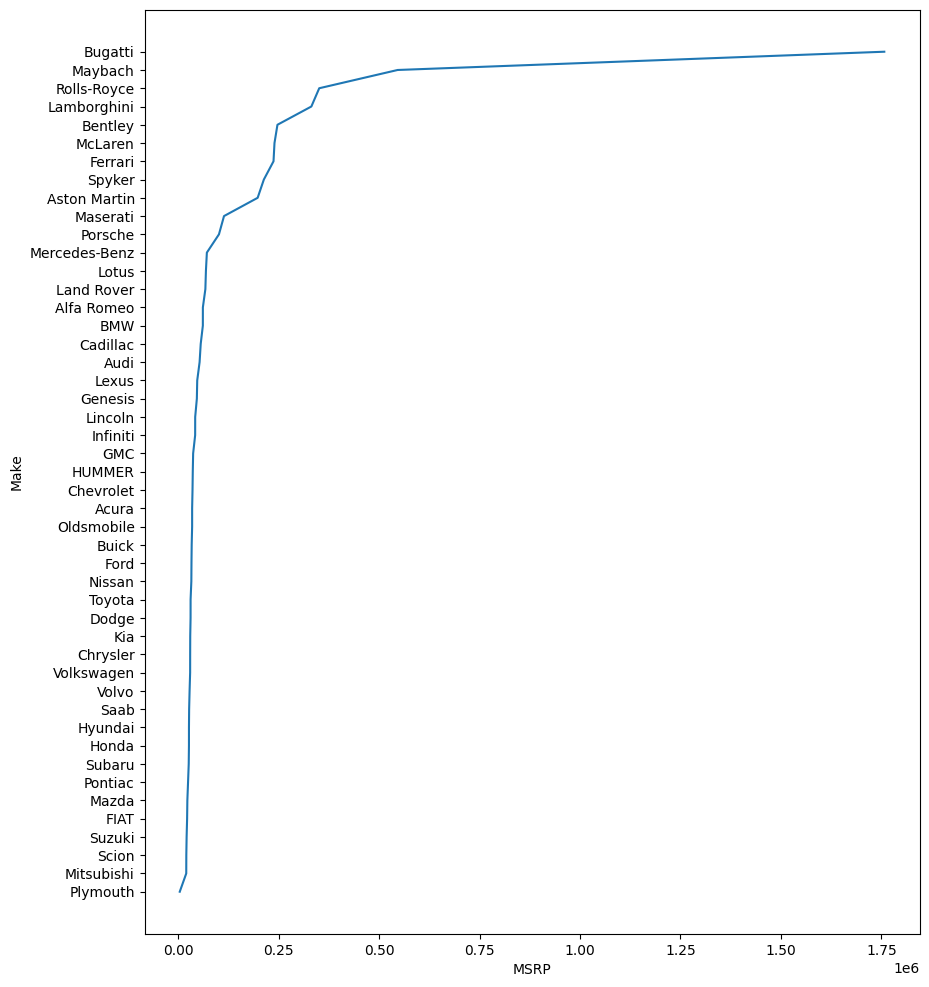

In [4]:
d1 = d.sort_values('MSRP')
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
plt.xlabel('MSRP')
plt.ylabel('Make')
plt.plot(d1.MSRP, d1.index)

Сортировка по возрастанию стоимости авто

## Ящик с усами (Box Plots) 
Ящик с усами является отличным инструментом для визуального представления описательной статистики набора данных. Он может показывать диапазон, межквартильный диапазон, медиану, моду, выбросы и все квартили. 
Параметры `.boxplot()`:

•	х ваши данные.

•	vert устанавливает горизонтальную ориентацию графика, когда False. Ориентация по умолчанию - вертикальная.

•	showmeans показывает среднее значение ваших данных, когда True.

•	meanline представляет среднее в виде линии, когда истина. Представлением по умолчанию является точка.

•	labels: метки ваших данных.

•	patch_artist определяет, как рисовать график.

•	medianprops обозначает свойства линии, представляющей медиану.

•	meanprops указывает свойства линии или точки, представляющей среднее значение.



{'whiskers': [<matplotlib.lines.Line2D at 0x18bd7c9eb60>,
 'caps': [<matplotlib.lines.Line2D at 0x18bd7c9f0a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x18bd7c9e7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18bd7c9f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18bd7c9fb20>],
 'means': [<matplotlib.lines.Line2D at 0x18bd7c9f880>]}

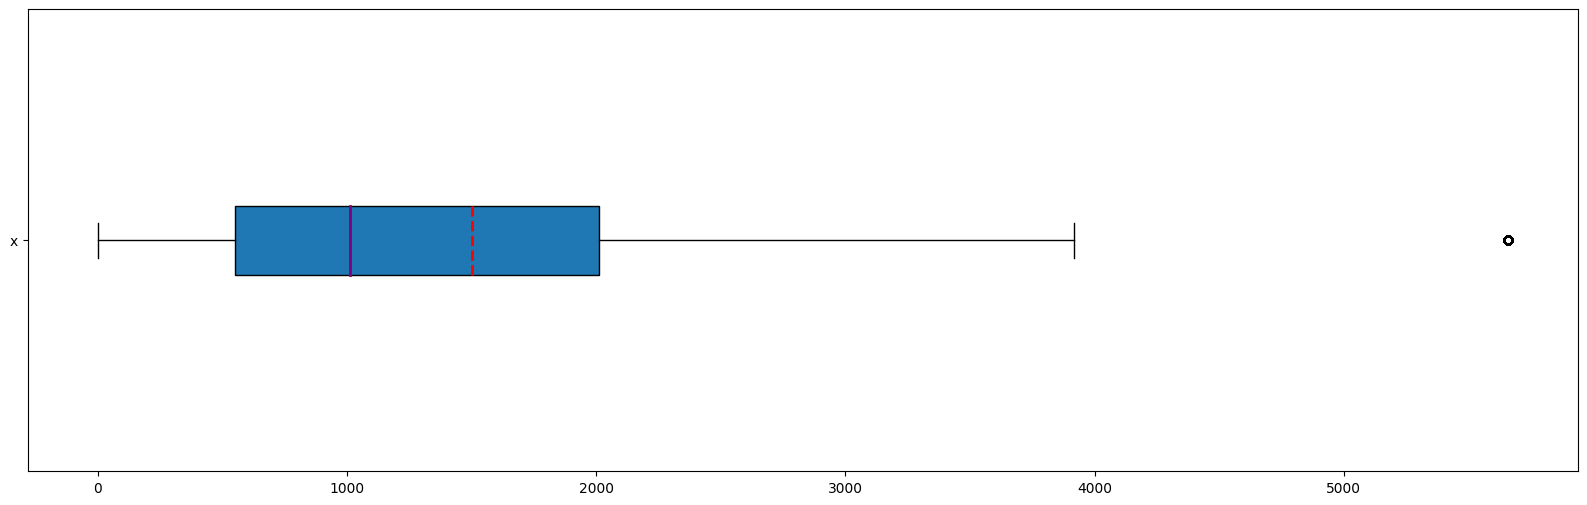

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
plt.boxplot(x=df['Popularity'], vert=False, showmeans=True, meanline=True, labels=('x'), 
            patch_artist=True, medianprops={'linewidth': 2, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

Вы можете увидеть распределение по показателю MSRP. Диаграмма соответствует одному набору данных и показывает следующее:

•	Среднее значение — это красная пунктирная линия.

•	Медиана — это фиолетовая линия.

•	Первый квартиль — левый край синего прямоугольника.

•	Третий квартиль — это правый край синего прямоугольника.

•	Межквартильный диапазон — это длина синего прямоугольника.

•	Диапазон — всё слева направо.

•	Выбросы — точки слева и справа.



![img](https://drive.google.com/uc?id=1p49-brqluBmnNSe0k8R25Iq-GsZdmgAq)

![img](https://drive.google.com/uc?id=1JsBHCwHT1ux5O-VdTMBS_FPfOAkCwpZv)

## Гистограмма 
Она особенно полезна, когда в наборе данных содержится большое количество уникальных значений. Гистограмма делит значения из отсортированного набора данных на интервалы, также называемые ячейками. Часто все лотки имеют одинаковую ширину, но это не обязательно так. Значения нижней и верхней границ ячейки называются ребрами ячейки.

•	Первый и самый левый столбец содержит значения, большие или равные 0 и меньшие 5.

•	Второй контейнер содержит значения, большие или равные 5 и меньшие 10.

•	Третий и самый правый контейнер содержит значения, большие или равные 10 и меньшие или равные 15.

Число корзин, на которые данные разбиваются, можно сконфигурировать, передав в функцию при построении гистограммы именованный аргумент bins.


(array([8.59476041e-06, 2.41780080e-05, 8.45690860e-06, 2.39742271e-06,
        1.20470491e-06, 6.59291245e-07, 4.49516758e-07, 3.35639179e-07,
        2.45735828e-07, 4.19548974e-07, 3.65606963e-07, 1.85800260e-07,
        1.49838919e-07, 1.55832476e-07, 1.43845362e-07, 9.58969083e-08,
        4.79484542e-08, 4.19548974e-08, 2.99677839e-08, 4.79484542e-08,
        3.59613406e-08, 5.39420109e-08, 2.99677839e-08, 4.79484542e-08,
        1.79806703e-08, 5.99355677e-09, 1.19871135e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.99355677e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

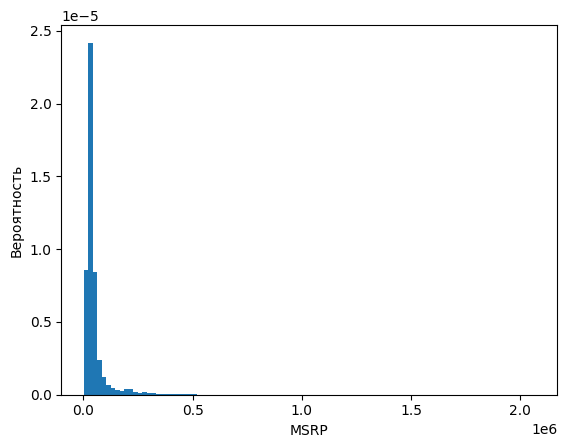

In [6]:
plt.xlabel('MSRP')
plt.ylabel('Вероятность')
plt.hist(x=df['MSRP'], bins=100, density=True)

## Круговые диаграммы 



array([<AxesSubplot: >], dtype=object)

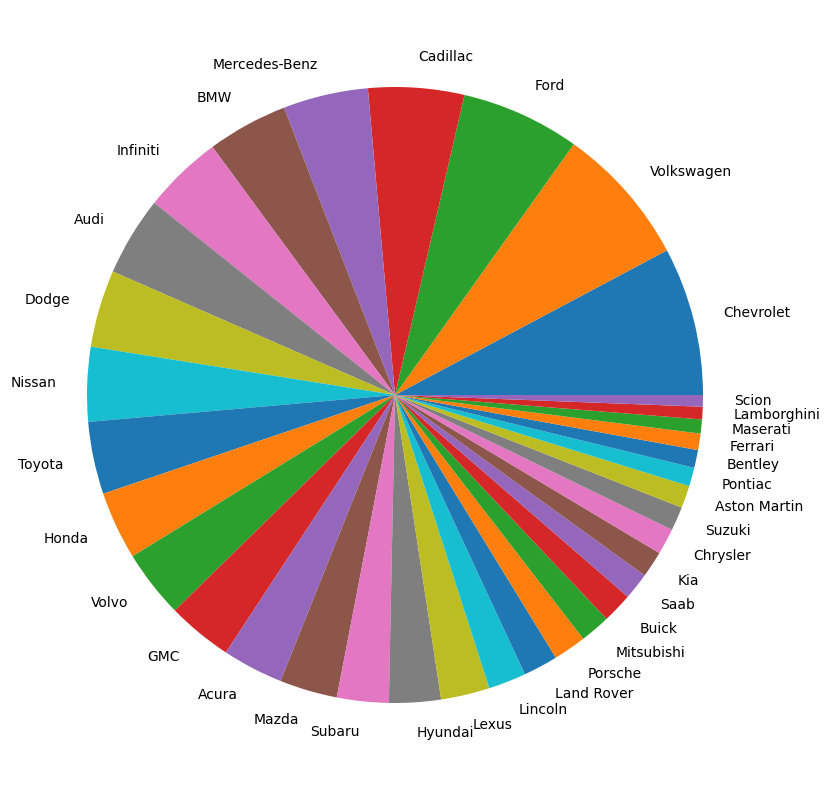

In [14]:
#группируем по Бренду, подсчитываем количество авто и сортируем в порядке убывания
d = df.groupby('Make', sort=True).size().sort_values(ascending = False)
#выводим первые 10
d=d.head(35)
#строим график
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
d.plot(kind='pie', subplots=True)

Из графика видно что монопольного производителя нет, больше всего у Chevrolet.

## Барный график 

Он представляет собой столбчатую диаграмму, которая показывает количественное отношение категориального признака. Например, выберем 7 стран, в которых производится большое число винных изделий. Каждый бар будет представлять страну, а высота определять количество вин, произведенных в этой стране. В matplotlib барный график называется bar, принимающий в качестве аргументов x – массив категорий и height – массив значений этой категории. 

<BarContainer object of 35 artists>

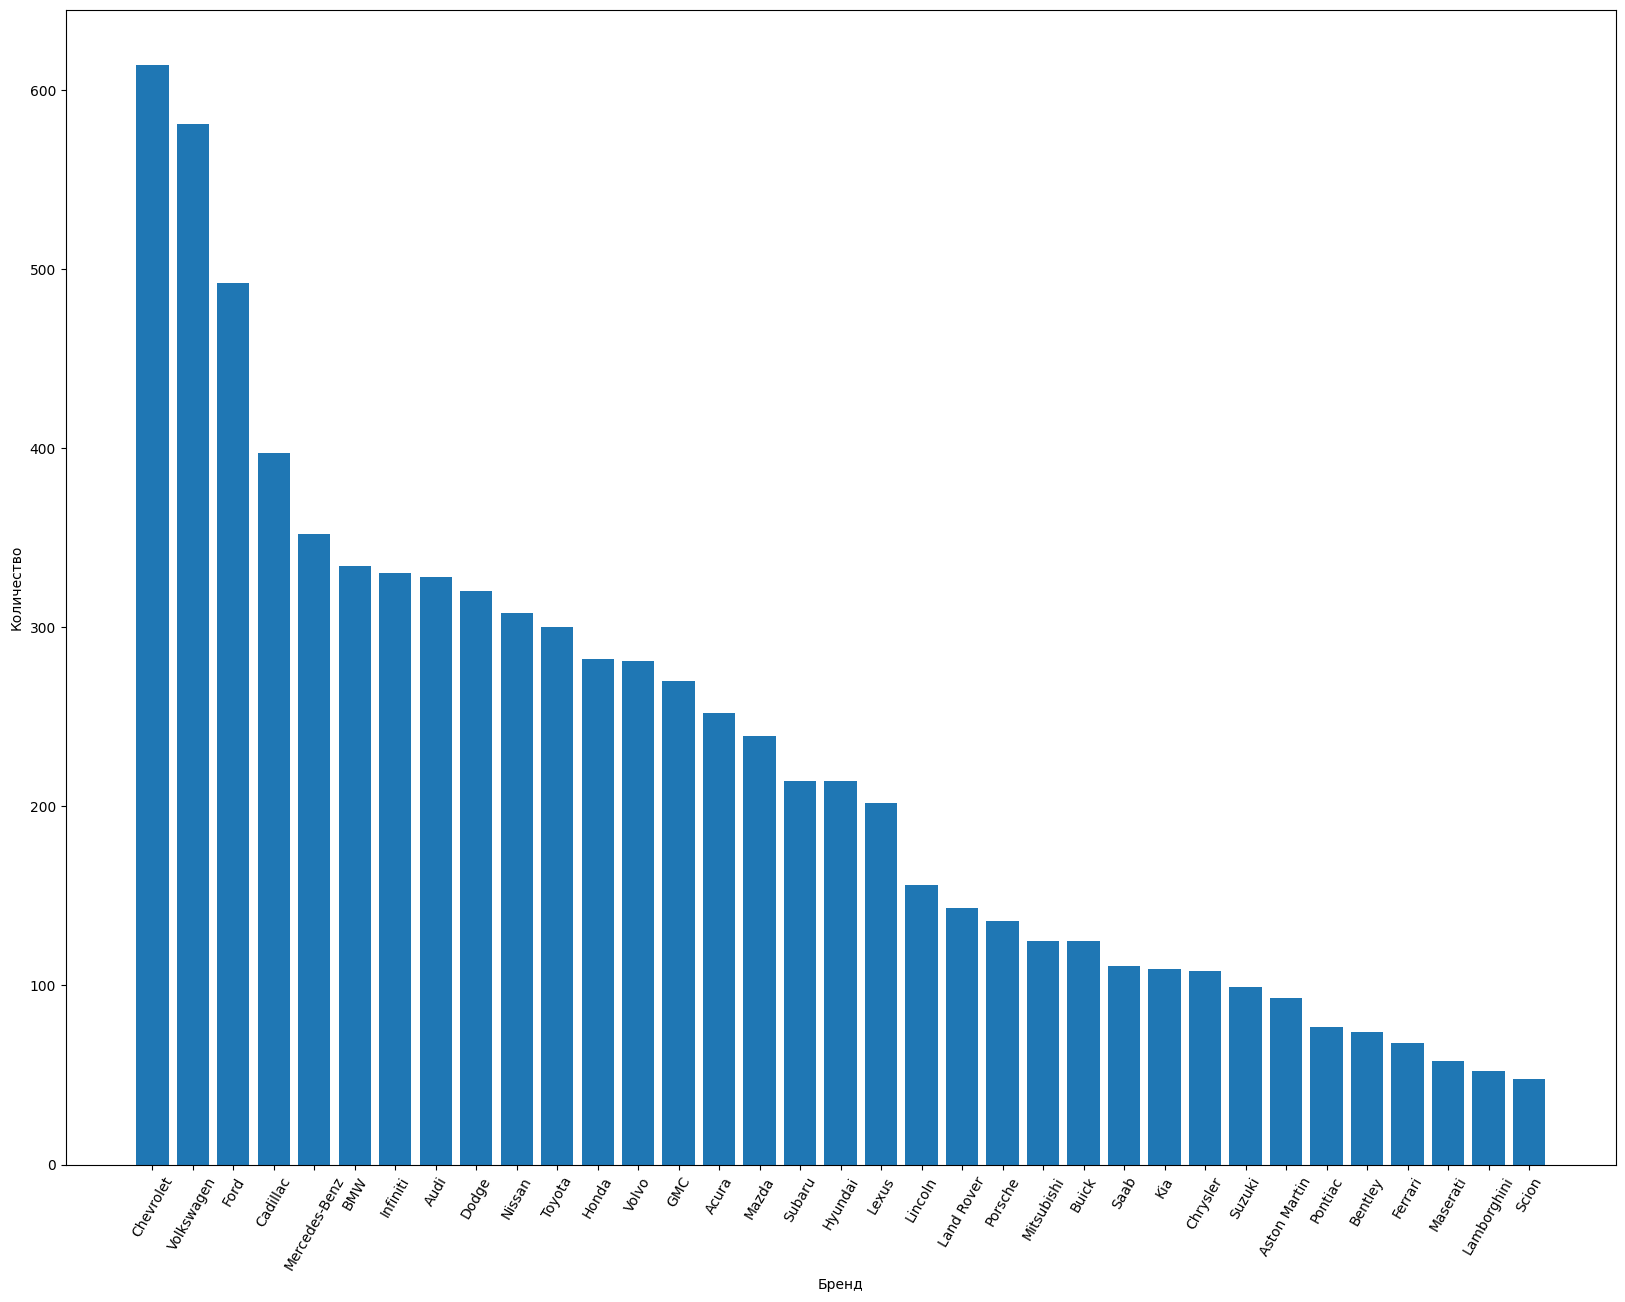

In [8]:
#группируем по странам, подсчитываем количество вин и сортируем в порядке убывания
d = df.groupby('Make', sort=True).size().sort_values(ascending = False)
#выводим первые 10
d=d.head(35)
#строим график
plt.figure(figsize=(20,15))
plt.xticks(rotation=60)
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.bar(d.index, d.values)



## Теперь давайте перейдем к библиотеке Seaborn. 

`Seaborn `— это по сути более высокоуровневое API на базе библиотеки matplotlib. `Seaborn` содержит более адекватные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.


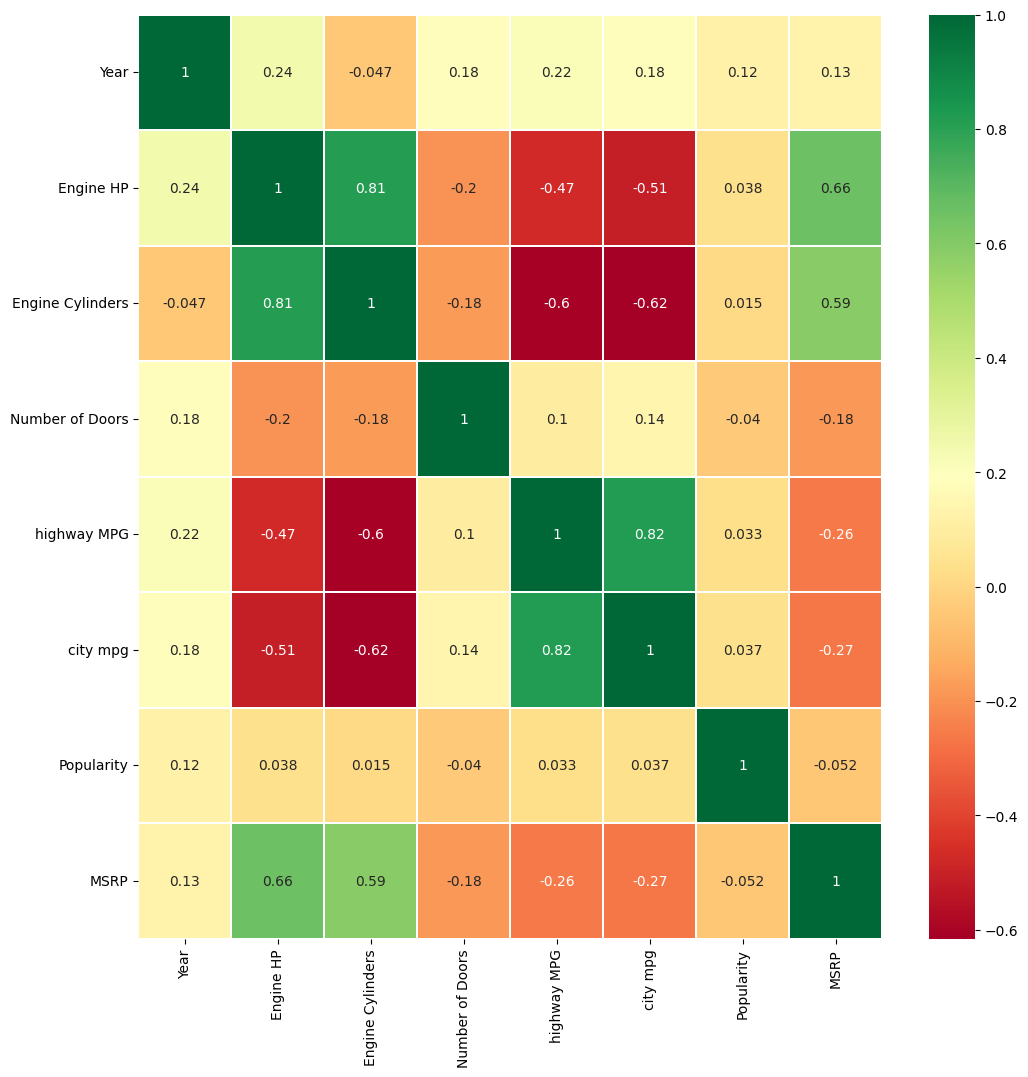

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
# используется для получения текущего значения
fig=plt.gcf() 
# Увстанавливаем размер диаграммы
fig.set_size_inches(12,12)
plt.show()

## Парный график 

Он отображает парные отношения в наборе данных. Функция парного графика создает сетку осей, так что каждая переменная в данных будет распределяться по оси Y по одной строке и по оси X по одному столбцу. Это создает графики, как показано ниже.

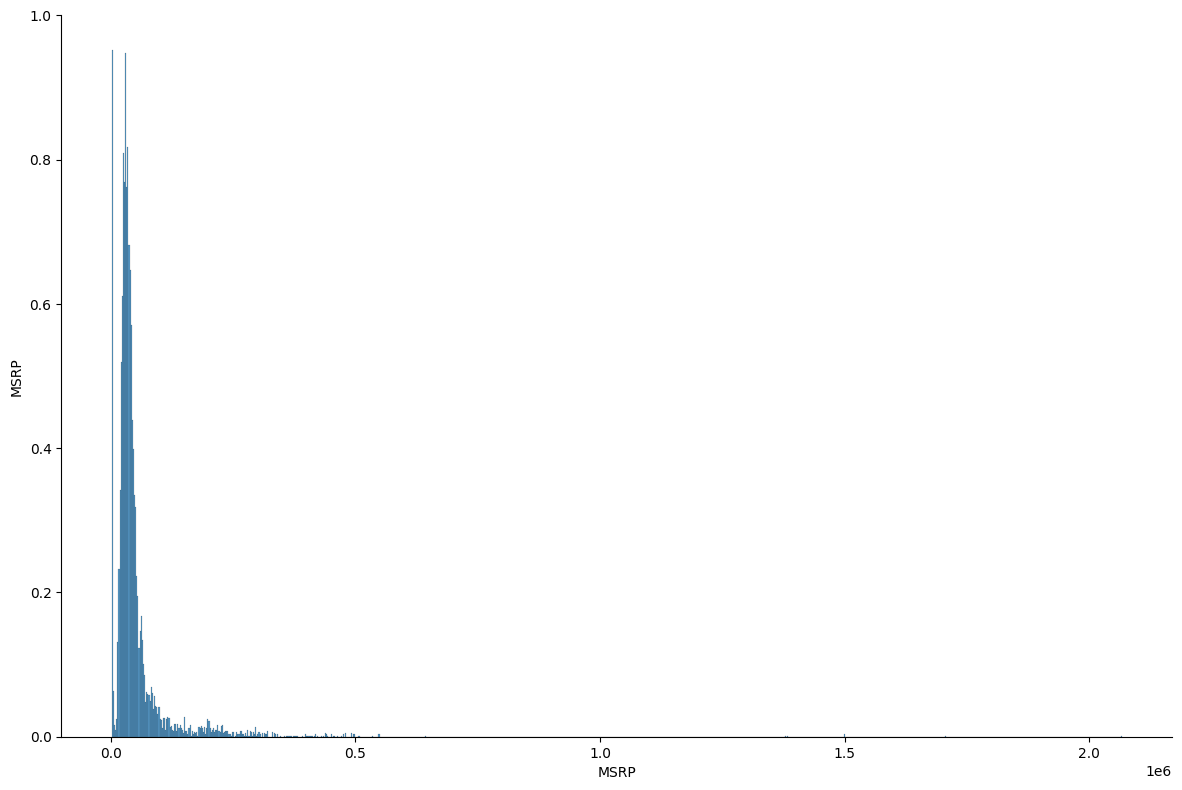

In [10]:
import seaborn as sns
sns_plot = sns.pairplot(df[['Make','MSRP']], height=8, aspect=1.5)

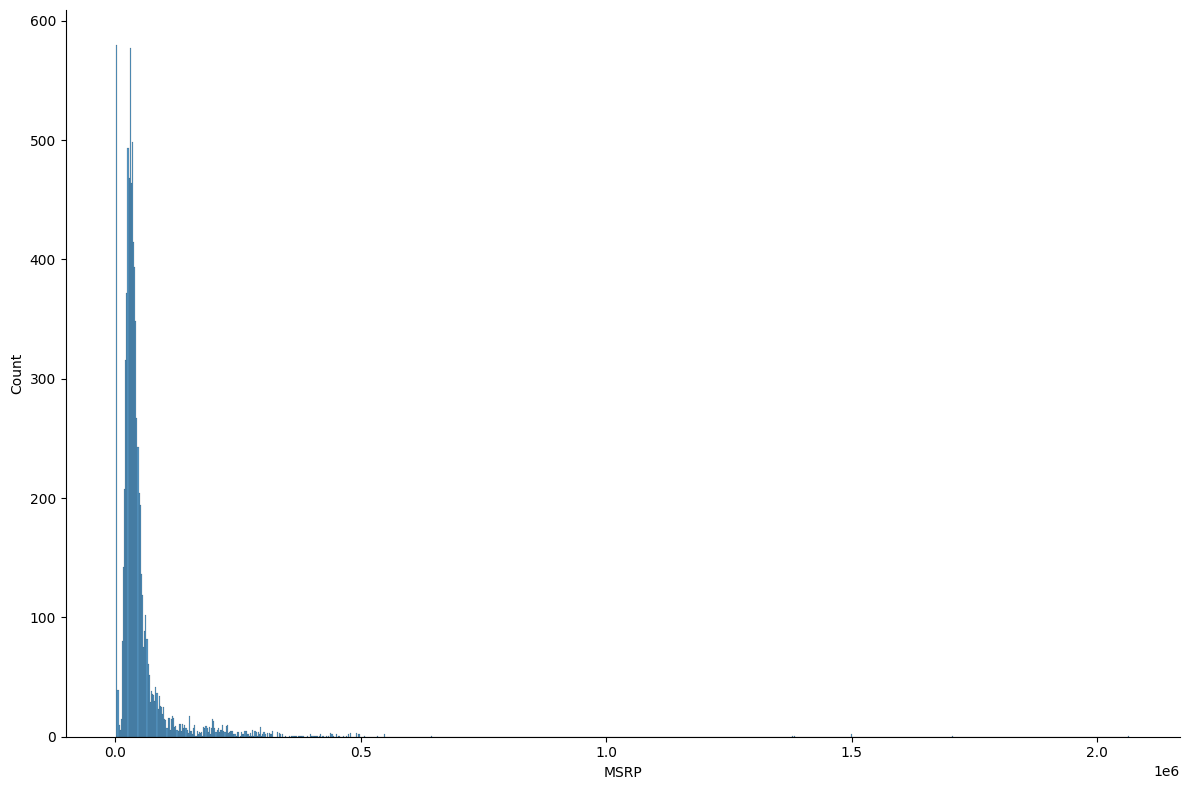

In [11]:
sns.displot(df.MSRP, height=8, aspect=1.5)

## Графики в `pandas`

<class 'matplotlib.axes._subplots.AxesSubplot'>
True


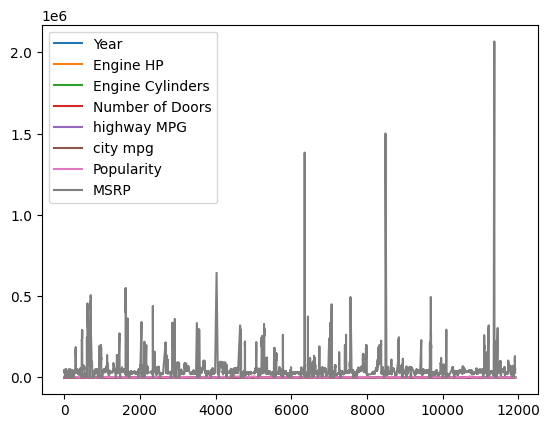

In [12]:
import pandas as pd # подключим pandas 
 
s = df
ax = s.plot() # отобразим его. Это метод из pandas, а не из matplotlib
 
print(type(ax)) # Но тип его это <matplotlib.axes._subplots.AxesSubplot at 0x121083eb8> #
 
print(id(plt.gca()) == id(ax)) # Такой же как у графиков из matplotlib:  True 